In [1]:
import pickle
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from CLaSP import CLaSP

In [3]:
with open('data/ChangePoint_test__gestures__10_r_high.pkl', 'rb') as handle:
    gestures = pickle.load(handle)
print(gestures.shape)
with open('data/ChangePoint_test__change_points__10_r_high.pkl', 'rb') as handle:
    change_points = pickle.load(handle)
print(change_points)

(10, 120, 67, 2)
[[ 18  42  59  82]
 [ 17  41  71 100]
 [ 15  36  46  69]
 [ 17  35  53  74]
 [ 16  42  54  83]
 [ 18  38  57  80]
 [ 16  40  57  88]
 [ 16  40  83 106]
 [ 13  32  55  71]
 [ 16  46  55  80]]


In [4]:
with open('data/new_hands/ChangePoint_test__selected_gestures__l_high.pkl', 'rb') as handle:
    gestures = pickle.load(handle)
print(gestures.shape)
with open('data/new_hands/ChangePoint_test__selected_se__l_high.pkl', 'rb') as handle:
    change_points = pickle.load(handle)
print(change_points)

(125, 120, 67, 2)
[[ 19.  64.]
 [ 19.  66.]
 [ 21.  62.]
 [ 21.  63.]
 [ 20.  65.]
 [ 19.  89.]
 [ 16.  76.]
 [ 16.  89.]
 [ 17.  97.]
 [ 16.  97.]
 [ 16.  92.]
 [ 15.  59.]
 [ 16.  66.]
 [ 14.  63.]
 [ 16.  68.]
 [ 12.  65.]
 [ 15.  66.]
 [ 19.  75.]
 [ 17.  72.]
 [ 17.  73.]
 [ 17.  70.]
 [ 17.  76.]
 [ 17.  77.]
 [ 16.  84.]
 [ 13.  83.]
 [ 14.  80.]
 [ 15.  81.]
 [ 15.  95.]
 [ 18.  86.]
 [ 16.  68.]
 [ 16.  82.]
 [ 17.  75.]
 [ 15.  87.]
 [ 16.  85.]
 [ 15.  78.]
 [ 17.  77.]
 [ 16.  82.]
 [ 17.  79.]
 [ 15.  87.]
 [ 14.  87.]
 [ 16.  89.]
 [ 18.  81.]
 [ 15.  85.]
 [ 14.  86.]
 [ 14.  80.]
 [ 15.  91.]
 [ 13.  80.]
 [ 18.  71.]
 [ 18.  70.]
 [ 18.  77.]
 [ 17.  79.]
 [ 17.  76.]
 [ 18.  76.]
 [ 16.  66.]
 [ 17.  67.]
 [ 15.  76.]
 [ 16.  82.]
 [ 14.  72.]
 [ 18.  74.]
 [ 16.  77.]
 [ 18.  94.]
 [ 16.  88.]
 [ 20.  86.]
 [ 16.  90.]
 [ 17.  90.]
 [ 19.  87.]
 [ 17.  82.]
 [ 18.  96.]
 [ 22.  94.]
 [ 19.  92.]
 [ 18.  87.]
 [ 15.  79.]
 [ 14.  73.]
 [ 14.  78.]
 [ 16.  76.]
 [ 14. 

In [5]:
gestures.shape

(125, 120, 67, 2)

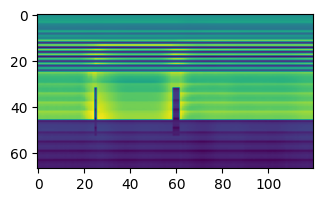

In [6]:
plt.figure(figsize=(4,2))
plt.imshow(gestures[4,::,::,0].T)
plt.show()

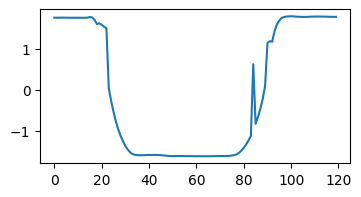

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
vec_pca = pca.fit_transform(gestures[9,::,::,1])

plt.figure(figsize=(4,2))
plt.plot(vec_pca)
plt.show()

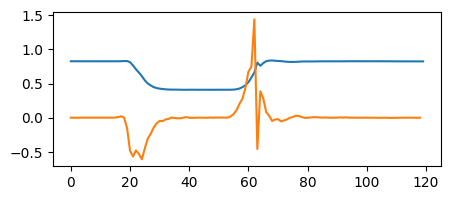

In [9]:
vec = gestures[1,::,15,1]
plt.figure(figsize=(5,2))
plt.plot(vec)
plt.plot(np.diff(vec,1)*10)
plt.show()

In [10]:
22*5

110

In [11]:
cls = CLaSP(window=12, solver='knn')
cls.fit(vec, n_segments=5)

print(cls.stack)

100%|█████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 165.53it/s]

deque([{'start': 106, 'stop': 120, 'clasp_scores': None, 'clasp_max_idx': -1, 'clasp_max_val': 0}, {'start': 0, 'stop': 13, 'clasp_scores': None, 'clasp_max_idx': -1, 'clasp_max_val': 0}, {'start': 92, 'stop': 106, 'clasp_scores': None, 'clasp_max_idx': -1, 'clasp_max_val': 0}, {'start': 13, 'stop': 64, 'clasp_scores': None, 'clasp_max_idx': None}, {'start': 64, 'stop': 92, 'clasp_scores': None, 'clasp_max_idx': None}])


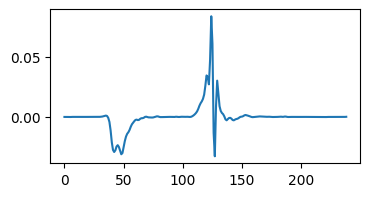

In [12]:
from scipy import interpolate

def interpolate_vec(vec, new_step_size=0.5):
    x = np.arange(0, vec.shape[0])
    y = vec
    f = interpolate.interp1d(x, y, kind='cubic', bounds_error=False, fill_value='extrapolate')
    xnew = np.arange(0, vec.shape[0], new_step_size)
    ynew = f(xnew)
    return xnew, ynew

xnew, ynew = interpolate_vec(vec, new_step_size=0.5)

plt.figure(figsize=(4,2))
# plt.plot(vec)
# plt.plot(xnew, ynew)
# plt.plot(ynew)
plt.plot(np.diff(ynew))

plt.show()

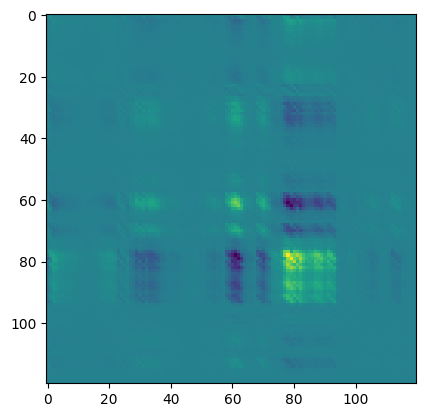

In [13]:
from scipy.spatial import distance_matrix

def create_dist_matrix(vec_ts, window):
    # expand vec by window//2 to keep same dims
    vec_left_expand = np.insert(vec_ts, obj=0, values=vec_ts[window//2:0:-1])
    vec_both_expand = np.insert(vec_left_expand, obj=-1, values=vec_ts[-window//2:])
    # matrix creation
    X_list = []
    j = 0
    while j < vec_both_expand.shape[0]-window:
        X_list.append(vec_both_expand[j:j+window])
        j += 1
    X = np.array(X_list)
    # distance matrix
    X_dist = distance_matrix(X, X)
    return X, X_dist

vec = gestures[0,::,16,1]
X, X_dist = create_dist_matrix(vec, window=4)
X_dist = np.diff(X) @ np.diff(X).T
plt.imshow(X_dist)
plt.show()

In [14]:
interp_step = .5
coef_ = int(1/interp_step)

for i in [0,1,2,3,4,5,6,7,8,9]:
    vec = gestures[i,::,16,1]
#     X, X_dist = create_dist_matrix(vec, window=4)
#     X_dist = np.diff(X) @ np.diff(X).T #X @ X.T
#     vec = np.diag(X_dist)
    
    # using SVD to select channel
#     pca = PCA(n_components=1)
#     vec = pca.fit_transform(gestures[i,::,::,1])[::,0]
    
    xnew, new_vec = interpolate_vec(vec, new_step_size=interp_step)
    new_vec += np.sin(np.arange(new_vec.shape[0])/2)*np.max(np.abs(new_vec))/20
    cls = CLaSP(window=20, solver='knn')
    cls.fit(np.diff(new_vec), n_segments=5)
#     cls.fit(new_vec, n_segments=5)
    
    
    numbers = set()
    for elem in cls.stack:
        numbers.add(elem['start'])
        numbers.add(elem['stop'])
    predicted_chp = np.array(sorted(list(numbers)))
    
    plt.figure(figsize=(4,1))
    plt.title('True')
    new_chps = [0]+list(change_points[i]*coef_) + [new_vec.shape[0]-1]
    for i in range(len(new_chps)-1):
        plt.plot(np.arange(new_chps[i], new_chps[i+1]),  new_vec[new_chps[i]:new_chps[i+1]])
    plt.show()
    
    plt.figure(figsize=(4,1))
    plt.title('Predicted')
    for i in range(len(predicted_chp)-1):
        plt.plot(np.arange(predicted_chp[i], predicted_chp[i+1]),  new_vec[predicted_chp[i]:predicted_chp[i+1]])
    plt.show()
    
    print('predicted=', predicted_chp[1:-1])
    print('true=     ',change_points[i]*coef_)
    print('='*20)

100%|███████████████████████████████████████████████████████████████████████████████| 132/132 [00:01<00:00, 117.06it/s]


TypeError: slice indices must be integers or None or have an __index__ method

In [92]:
def diff_of_closest(true_change_points, predicted_change_points):
    diffs = []
#     assert len(true_change_points) == len(predicted_change_points), 'Different sizes'
    
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return array[idx]
    
    for pred_chp in predicted_change_points:
        true_chp = find_nearest(true_change_points, pred_chp)
        diffs.append(np.abs(pred_chp-true_chp))
    
    return diffs
    
diff_of_closest(true_change_points=[1,2,3], predicted_change_points=[1,5,8])

[0, 2, 5]

In [111]:
# Gridsearch of optimal sinus and window

interp_step = .5
coef_ = int(1/interp_step)

final_diff = {}
final_simple_diff = {}
final_preds = {}

for window_size in [20]:#[16, 20, 24]:
    for wt_sin in [0.5]:
        for A_sin in [15,20,25]:#[5, 10, 20, 30, 50]:
            
            cur_diff = []
            cur_simple_diff = []
            cur_preds = []
            
            for i in [0,1,2,3,4,5,6,7,8,9]:
                print(i)
                vec = gestures[i,::,16,1]
                # interpolation
                xnew, new_vec = interpolate_vec(vec, new_step_size=interp_step)
                # adding sinus
                A = np.max(np.abs(new_vec))/A_sin
                wt =  np.arange(new_vec.shape[0])*wt_sin
                new_vec = new_vec + A*np.sin(wt)
                # clasp fit
                cls = CLaSP(window=window_size, solver='knn')
                cls.fit(np.diff(new_vec), n_segments=5)

                # getting predicted changepoints
                numbers = set()
                for elem in cls.stack:
                    numbers.add(elem['start'])
                    numbers.add(elem['stop'])
                predicted_chp = np.array(sorted(list(numbers)))

                # saving
                cur_diff += diff_of_closest(change_points[i]*coef_, predicted_chp[1:-1])
                cur_simple_diff.append(np.abs(change_points[i]*coef_ - predicted_chp[1:-1]))
                cur_preds.append(predicted_chp[1:-1])
            # saving to dict
            final_diff[(window_size, wt_sin, A_sin)] = cur_diff
            final_simple_diff[(window_size, wt_sin, A_sin)] = cur_simple_diff
            final_preds[(window_size, wt_sin, A_sin)] = cur_preds            

0


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 128.87it/s]


1


100%|█████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 138.94it/s]


2


100%|█████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<00:00, 134.51it/s]


3


100%|█████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 136.76it/s]


4


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 187.58it/s]


5


100%|█████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 145.63it/s]


6


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 157.89it/s]


7


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 178.55it/s]


8


100%|█████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<00:00, 125.08it/s]


9


100%|█████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 140.88it/s]


0


100%|█████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 139.98it/s]


1


100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 119.72it/s]


2


100%|█████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<00:00, 129.94it/s]


3


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 136.29it/s]


4


100%|█████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 146.23it/s]


5


100%|█████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 138.28it/s]


6


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 142.23it/s]


7


100%|█████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 131.65it/s]


8


100%|█████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 134.10it/s]


9


100%|█████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 142.01it/s]


0


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 136.30it/s]


1


100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 134.92it/s]


2


100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 123.41it/s]


3


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 115.46it/s]


4


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 174.86it/s]


5


100%|█████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 139.95it/s]


6


100%|█████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 108.55it/s]


7


100%|█████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 103.58it/s]


8


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 116.41it/s]


9


100%|█████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 130.09it/s]


In [112]:
for key in final_diff:
    list_diffs = final_diff[key]
    list_simple_diffs = final_simple_diff[key]
    print(f'window, wt, A={key}, mean_score={np.mean(list_diffs)}, mean_simple_score={np.mean(list_simple_diffs)}')
    print(f'window, wt, A={key},  std_score={np.std(list_diffs)},   std_simple_score={np.std(list_simple_diffs)}')    
    print()

window, wt, A=(20, 0.5, 15), mean_score=7.95, mean_simple_score=8.9
window, wt, A=(20, 0.5, 15),  std_score=10.809602212847613,   std_simple_score=11.943198901466893

window, wt, A=(20, 0.5, 20), mean_score=6.15, mean_simple_score=8.3
window, wt, A=(20, 0.5, 20),  std_score=3.908644266238615,   std_simple_score=9.132907532653553

window, wt, A=(20, 0.5, 25), mean_score=7.05, mean_simple_score=8.3
window, wt, A=(20, 0.5, 25),  std_score=5.342986056504359,   std_simple_score=6.860029154456998



In [ ]:
n = 8
print(cls.final_split_stack[n]['start'])
print(cls.final_split_stack[n]['stop'])
print(cls.final_split_stack[n]['clasp_max_idx'])

In [ ]:
ni = 2
print(cls.stack[ni]['start'])
print(cls.stack[ni]['stop'])
print(cls.stack[ni]['clasp_max_idx'])
print(cls.stack[ni]['clasp_max_val'])

print(cls.stack[ni]['clasp_max_idx'] + cls.stack[ni]['start'])

In [ ]:
plt.figure(figsize=(6,3))
# plt.plot(cls.final_split_stack[n]['clasp_scores'][20:-20])
plt.plot(cls.stack[ni]['clasp_scores'][20:-20])
# plt.plot(cls.final_split_stack[4]['clasp_scores'][50:-50])
plt.show()

In [ ]:
plt.figure(figsize=(6,2))
plt.title('True')
new_chps = [0]+list(change_points[i]*coef_) + [new_vec.shape[0]-1]
for i in range(len(new_chps)-1):
    plt.plot(np.arange(new_chps[i], new_chps[i+1])[1:],  np.diff(new_vec[new_chps[i]:new_chps[i+1]]))
plt.show()

plt.figure(figsize=(6,2))
plt.title('Predicted')
for i in range(len(predicted_chp)-1):
    plt.plot(np.arange(predicted_chp[i], predicted_chp[i+1])[1:],  np.diff(new_vec[predicted_chp[i]:predicted_chp[i+1]]))
plt.show()

print('predicted=', predicted_chp[1:-1])
print('true=     ',change_points[i]*coef_)
print('='*20)

In [ ]:
np.argmax(cls.final_split_stack[0]['clasp_scores'][51:-51])

In [ ]:
print(cls.final_split_stack[3]['start'])
print(cls.final_split_stack[3]['stop'])
print(cls.final_split_stack[3]['clasp_max_idx'])

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(cls.final_split_stack[3]['clasp_scores'][50:-50])
# plt.plot(cls.final_split_stack[4]['clasp_scores'][50:-50])
plt.show()

In [ ]:
predicted_chp